In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [ ]:
gold_data = pd.read_csv('/content/sample_data/gld_price_data.csv')
gold_data.head()

In [ ]:
gold_data.tail()

In [ ]:
gold_data.info()

In [ ]:
gold_data.isnull().sum()

In [ ]:
gold_data.describe()

In [9]:
correlation = gold_data.corr()

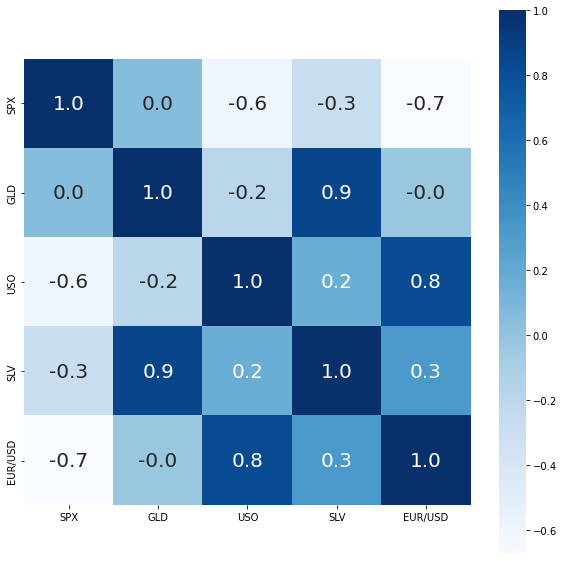

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':20},cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


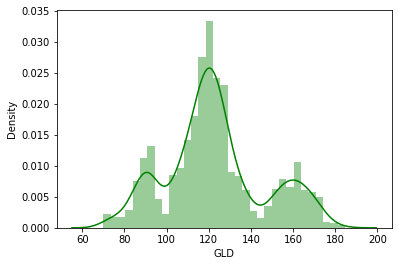

In [19]:
sns.distplot(gold_data['GLD'],color='green')

In [20]:
X = gold_data.drop(columns=['GLD','Date'],axis=1)
Y = gold_data['GLD']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [26]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [27]:
ypre = model.predict(x_test)
accr = metrics.r2_score(y_test,ypre)
print(accr)

0.9895110166170045


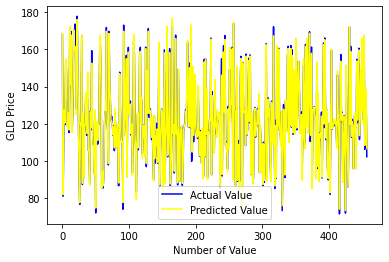

In [34]:
plt.plot(np.array(y_test),color='blue',label='Actual Value')
plt.plot(ypre,color='yellow',label='Predicted Value')
plt.xlabel('Number of Value')
plt.ylabel('GLD Price')
plt.legend()
plt.show()